In [61]:
# 1. Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [62]:
# 2. Carga de datos (Asegúrate de cambiar 'tu_dataset.csv' por el nombre real de tu archivo)
df = pd.read_csv("weather_forecast_data.csv")

In [63]:
# 3. Conversión de la variable objetivo ("no lluvia" -> 0, "lluvia" -> 1)
df["Rain"] = df["Rain"].map({"no rain": 0, "rain": 1})
print(df["Rain"])

0       1
1       0
2       0
3       1
4       0
       ..
2495    0
2496    0
2497    0
2498    0
2499    0
Name: Rain, Length: 2500, dtype: int64


In [64]:
# 4. Exploración inicial
print(df.head())  # Primeras filas
print(df.info())  # Información general del dataset
print(df.describe())  # Resumen estadístico
print(df["Rain"].value_counts())  # Distribución del target

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure  Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     1
1    27.879734  46.489704    5.952484     4.990053   992.614190     0
2    25.069084  83.072843    1.371992    14.855784  1007.231620     0
3    23.622080  74.367758    7.050551    67.255282   982.632013     1
4    20.591370  96.858822    4.643921    47.676444   980.825142     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 117.3 KB
None
       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure  \
count  

In [65]:
# 5. División de datos en variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=["Rain"])  # Variables de entrada
y = df["Rain"]  # Variable objetivo


In [66]:
# 6. División de los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [67]:
# 7. Normalización de los datos (importante para Regresión Logística)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
# 8. Creación y entrenamiento del modelo de Regresión Logística con parámetros por defecto
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
# 9. Predicción en el conjunto de prueba
y_pred = model.predict(X_test)

In [70]:
# 10. Evaluación del modelo: Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

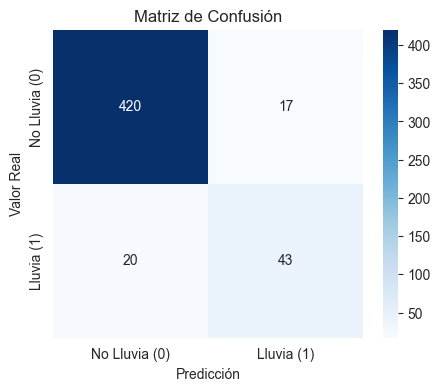

In [71]:
# 11. Visualización de la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Lluvia (0)', 'Lluvia (1)'],
            yticklabels=['No Lluvia (0)', 'Lluvia (1)'])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

Verdaderos Negativos (TN = 420)
- Son los días en los que realmente NO llovió y el modelo predijo correctamente que no llovería.
- Bueno, indica que el modelo identifica bien los días sin lluvia.

Verdaderos Positivos (TP = 43)
- Son los días en los que realmente llovió y el modelo predijo correctamente la lluvia.
- Bueno, aunque el número es bajo en comparación con TN.

Falsos Positivos (FP = 17)
- Son los días en los que NO llovió, pero el modelo predijo lluvia incorrectamente.
- Error menor, aunque puede causar inconvenientes si la predicción se usa para planificación (ej. llevar paraguas innecesariamente).

Falsos Negativos (FN = 20)
- Son los días en los que sí llovió, pero el modelo predijo que NO llovería.
- Error más grave, ya que significa que personas podrían haberse confiado en la predicción y ser sorprendidas por la lluvia.

In [72]:
# 12. Cálculo de métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [73]:
# 13. Impresión de métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9260
Precision: 0.7167
Recall: 0.6825


Accuracy: 92.60%
- El modelo clasifica correctamente el 92.6% de los casos en total.
- Indica un buen desempeño general, pero puede estar sesgado si hay más días sin lluvia que con lluvia en el dataset.

Precision: 71.67%
- Cuando el modelo predice "lluvia", tiene un 71.67% de acierto.
- Significa que 28.33% de las veces predice lluvia erróneamente (falsos positivos).
- Es bueno si queremos evitar falsas alarmas.

Recall: 68.25%
- De todos los días que realmente llovió, el modelo detectó correctamente el 68.25%.
- Esto implica que en 31.75% de los casos falló en predecir la lluvia (falsos negativos).
- Es preocupante si la predicción se usa para prevenir imprevistos, ya que algunas lluvias no serán detectadas.